# E-Commerce Customer Segmentation

<img src ="images1.jpg">

# By caluclating the RFM Score and applying unsupervised clustering using KMeans

In [35]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [36]:
data = pd.read_csv('E-com_Data.csv')
data.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [37]:
rows,cols = data.shape
print(f' Data has {rows} rows and {cols} columns')

 Data has 541116 rows and 12 columns


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoieNo           537979 non-null  float64
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


In [39]:
cat_feat = []
num_feat = []
for attribute in data.columns:
    if data[attribute].dtype == 'O':
        cat_feat.append(attribute)
    else:
        num_feat.append(attribute)
        
print(len(cat_feat), len(num_feat))

6 6


In [40]:
data.isnull().sum()

CustomerID           136927
Item Code              3137
InvoieNo               3137
Date of purchase       3137
Quantity               3137
Time                   3137
price per Unit         3137
Price                  3137
Shipping Location      3137
Cancelled_status     532771
Reason of return     541113
Sold as set          541116
dtype: int64

In [41]:
# Percentage of missing values:
np.round(data.isnull().sum()/len(data)*100,2)

CustomerID            25.30
Item Code              0.58
InvoieNo               0.58
Date of purchase       0.58
Quantity               0.58
Time                   0.58
price per Unit         0.58
Price                  0.58
Shipping Location      0.58
Cancelled_status      98.46
Reason of return     100.00
Sold as set          100.00
dtype: float64

In [42]:
data.columns

Index(['CustomerID', 'Item Code', 'InvoieNo', 'Date of purchase', 'Quantity',
       'Time', 'price per Unit', 'Price', 'Shipping Location',
       'Cancelled_status', 'Reason of return', 'Sold as set'],
      dtype='object')

In [43]:
data_to_drop = ['Item Code','Quantity','Time', 'price per Unit','Shipping Location',
       'Cancelled_status', 'Reason of return', 'Sold as set']

data = data.drop(data_to_drop, axis = 1)
data.head()

,CustomerID,InvoieNo,Date of purchase,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


In [44]:
data = data.rename(columns={'InvoieNo' : 'InvoiceNo', 'Date of purchase':'Date'})
data.head()

,CustomerID,InvoiceNo,Date,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


In [45]:
print("No. of Duplicates present in the dataset : ", data.duplicated().sum())
data = data.drop_duplicates(ignore_index=True)
print('Size of dataset after removal of duplicates', data.shape)

No. of Duplicates present in the dataset :  6008
Size of dataset after removal of duplicates (535108, 4)


In [46]:
# Removing missing values in Customer ID
data = data.dropna(subset=['CustomerID'])
data.isna().sum()

CustomerID    0
InvoiceNo     0
Date          0
Price         0
dtype: int64

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402859 entries, 0 to 535079
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   CustomerID  402859 non-null  float64
 1   InvoiceNo   402859 non-null  float64
 2   Date        402859 non-null  object 
 3   Price       402859 non-null  float64
dtypes: float64(3), object(1)
memory usage: 15.4+ MB


In [48]:
data['Date'] = pd.to_datetime(data['Date'])

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402859 entries, 0 to 535079
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   CustomerID  402859 non-null  float64       
 1   InvoiceNo   402859 non-null  float64       
 2   Date        402859 non-null  datetime64[ns]
 3   Price       402859 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 15.4 MB


In [50]:
data.describe()

,CustomerID,InvoiceNo,Price
count,402859.000000,402859.000000,402859.000000
mean,2182.187224,385642.971491,2477.465103
std,1252.636483,13106.663884,4896.268647
min,2.000000,361429.000000,-10152.000000
25%,1207.000000,374193.000000,556.000000
50%,2078.000000,386934.000000,1572.000000
75%,3291.000000,397130.000000,2496.000000
max,4372.000000,406651.000000,90400.000000


In [51]:
data['Date'].describe()

count                  402859
unique                    381
top       2017-11-24 00:00:00
freq                     2507
first     2016-02-12 00:00:00
last      2017-12-19 00:00:00
Name: Date, dtype: object

In [52]:
import datetime as dt
latest_date = dt.datetime(2017, 12,20)
latest_date

datetime.datetime(2017, 12, 20, 0, 0)

In [53]:
data.head()

,CustomerID,InvoiceNo,Date,Price
0,4355.0,398177.0,2017-10-29,1926.0
1,4352.0,394422.0,2017-05-10,1740.0
2,4352.0,394422.0,2017-12-10,1866.0
3,4352.0,388633.0,2017-08-22,1869.0
4,4352.0,394422.0,2017-10-10,1888.0


In [61]:
RFMScore = data.groupby('CustomerID').agg({'Date': lambda x :(latest_date- x.max()).days,
                                          'InvoiceNo': lambda x : x.count(),
                                          'Price' : lambda x: x.sum()})

RFMScore.rename(columns = {'Date': 'Recency', 'InvoiceNo':'Frequency','Price':'Monetary'}, inplace=True)
RFMScore.head()

,Recency,Frequency,Monetary
CustomerID,,,
2.0,4,181,550416.0
3.0,77,27,257404.0
4.0,20,72,176613.0
5.0,18,16,41976.0
6.0,9,84,151822.0


In [62]:
RFMScore.reset_index()

,CustomerID,Recency,Frequency,Monetary
0,2.0,4,181,550416.0
1,3.0,77,27,257404.0
2,4.0,20,72,176613.0
3,5.0,18,16,41976.0
4,6.0,9,84,151822.0
...,...,...,...,...
4344,4368.0,17,10,20480.0
4345,4369.0,181,7,10774.0
4346,4370.0,12,13,24962.0
4347,4371.0,4,751,279720.0


In [63]:
for attribute in RFMScore:
    print(f'For {attribute} the min value is {RFMScore[attribute].min()} and max value is {RFMScore[attribute].max()}')

For Recency the min value is 1 and max value is 617
For Frequency the min value is 1 and max value is 7919
For Monetary the min value is -50372.0 and max value is 35472089.0


In [64]:
RFMScore.describe()

,Recency,Frequency,Monetary
count,4349.000000,4349.000000,4.349000e+03
mean,61.445160,92.632559,2.294939e+05
std,89.656941,230.742279,8.556685e+05
min,1.000000,1.000000,-5.037200e+04
25%,10.000000,17.000000,3.814000e+04
50%,19.000000,42.000000,8.363500e+04
75%,73.000000,101.000000,2.054440e+05
max,617.000000,7919.000000,3.547209e+07


In [69]:
# Creating Dictionary for all the quantiles 
quantile = RFMScore.quantile(q=[0.25, 0.5, 0.75])
quantile = quantile.to_dict()
quantile

{'Recency': {0.25: 10.0, 0.5: 19.0, 0.75: 73.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetary': {0.25: 38140.0, 0.5: 83635.0, 0.75: 205444.0}}

In [82]:
# Creating Recency score
def recency_score(x, p, d):
    # x - condition, p - percentile/quantile, d - datapoint
    if x <= d[p][0.25]:
        return 1
    elif x <=d[p][0.50]:
        return 2
    elif x <=d[p][0.75]:
        return 3
    else:
        return 4
    
def FnM_Score(x, p, d):
    # x- condition, p - percentile/quantile, d - data point
    if x <= d[p][0.25]:
        return 4
    elif x <=d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [83]:
RFMScore['R'] = RFMScore["Recency"].apply(recency_score, args=('Recency', quantile, ))
RFMScore['F'] = RFMScore["Frequency"].apply(FnM_Score, args=('Frequency', quantile, ))
RFMScore['M'] = RFMScore["Monetary"].apply(FnM_Score, args=('Monetary', quantile, ))

In [84]:
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,RFM_Score
0,2.0,4,181,550416.0,1,1,1,111,3
1,3.0,77,27,257404.0,4,3,1,431,8
2,4.0,20,72,176613.0,3,2,2,311,5
3,5.0,18,16,41976.0,2,4,3,243,9
4,6.0,9,84,151822.0,1,2,2,111,3


In [85]:
RFMScore['RFM'] = RFMScore.R.map(str) + RFMScore.F.map(str) + RFMScore.M.map(str)
RFMScore['RFM_Score'] = RFMScore[['R','F','M']].sum(axis=1)
RFMScore.reset_index(inplace=True)
RFMScore.head()

,index,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,RFM_Score
0,0,2.0,4,181,550416.0,1,1,1,111,3
1,1,3.0,77,27,257404.0,4,3,1,431,8
2,2,4.0,20,72,176613.0,3,2,2,322,7
3,3,5.0,18,16,41976.0,2,4,3,243,9
4,4,6.0,9,84,151822.0,1,2,2,122,5


# Customer Loyalty Points

In [86]:
Loyal_customer = ['Platinum','Gold', 'Silver','Bronze']
score_cuts = pd.qcut(RFMScore.RFM_Score, 4, labels=Loyal_customer)

In [88]:
RFMScore['Loyalty'] = score_cuts.values
RFMScore.reset_index(inplace=True)
RFMScore.head()

,level_0,index,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,RFM_Score,Loyalty
0,0,0,2.0,4,181,550416.0,1,1,1,111,3,Platinum
1,1,1,3.0,77,27,257404.0,4,3,1,431,8,Gold
2,2,2,4.0,20,72,176613.0,3,2,2,322,7,Gold
3,3,3,5.0,18,16,41976.0,2,4,3,243,9,Silver
4,4,4,6.0,9,84,151822.0,1,2,2,122,5,Platinum


In [87]:
score_cuts.values

['Platinum', 'Gold', 'Gold', 'Silver', 'Platinum', ..., 'Silver', 'Bronze', 'Silver', 'Platinum', 'Gold']
Length: 4349
Categories (4, object): ['Platinum' < 'Gold' < 'Silver' < 'Bronze']

In [89]:
RFMScore['Loyalty'].value_counts()

Platinum    1308
Gold        1289
Silver       940
Bronze       812
Name: Loyalty, dtype: int64

# Visualization

In [90]:
RFMScore.head()

,level_0,index,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,RFM_Score,Loyalty
0,0,0,2.0,4,181,550416.0,1,1,1,111,3,Platinum
1,1,1,3.0,77,27,257404.0,4,3,1,431,8,Gold
2,2,2,4.0,20,72,176613.0,3,2,2,322,7,Gold
3,3,3,5.0,18,16,41976.0,2,4,3,243,9,Silver
4,4,4,6.0,9,84,151822.0,1,2,2,122,5,Platinum


In [91]:
del RFMScore['index']
del RFMScore['level_0']

In [92]:
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,RFM_Score,Loyalty
0,2.0,4,181,550416.0,1,1,1,111,3,Platinum
1,3.0,77,27,257404.0,4,3,1,431,8,Gold
2,4.0,20,72,176613.0,3,2,2,322,7,Gold
3,5.0,18,16,41976.0,2,4,3,243,9,Silver
4,6.0,9,84,151822.0,1,2,2,122,5,Platinum


In [95]:
new_data = RFMScore.groupby('Loyalty')[['Recency','Frequency','Monetary','CustomerID']].agg(({
    'Recency':'sum','Frequency':'sum','Monetary':'sum','CustomerID':'nunique'}))

new_data.reset_index(inplace=True)

In [96]:
new_data.head()

,Loyalty,Recency,Frequency,Monetary,CustomerID
0,Platinum,13340,297150,765731356.0,1308
1,Gold,42079,73994,160271639.0,1289
2,Silver,78927,23588,52766014.1,940
3,Bronze,132879,8127,19300105.0,812


In [97]:
new_data = new_data.rename(columns={'CustomerID':'No_of_customers'})
new_data.head()

,Loyalty,Recency,Frequency,Monetary,No_of_customers
0,Platinum,13340,297150,765731356.0,1308
1,Gold,42079,73994,160271639.0,1289
2,Silver,78927,23588,52766014.1,940
3,Bronze,132879,8127,19300105.0,812


In [100]:
new_data['Percentage'] = round(new_data['No_of_customers']/len(RFMScore)*100,2)
new_data

,Loyalty,Recency,Frequency,Monetary,No_of_customers,Percentage
0,Platinum,13340,297150,765731356.0,1308,30.08
1,Gold,42079,73994,160271639.0,1289,29.64
2,Silver,78927,23588,52766014.1,940,21.61
3,Bronze,132879,8127,19300105.0,812,18.67


In [101]:
vis_data = new_data[['Loyalty','No_of_customers','Percentage']]
vis_data.head()

,Loyalty,No_of_customers,Percentage
0,Platinum,1308,30.08
1,Gold,1289,29.64
2,Silver,940,21.61
3,Bronze,812,18.67


In [103]:
!pip install squarify

In [104]:
import squarify

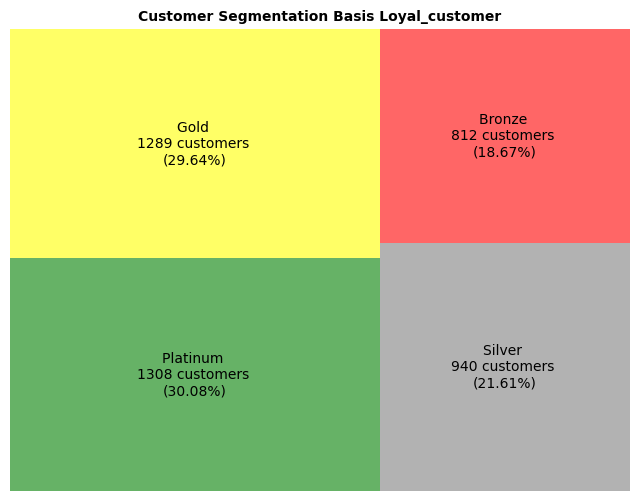

In [105]:
import squarify
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(8,6)
colors_dics = {'Platinum':'green', 'Gold':"yellow",'Silver':'gray','Bronze':'red'}

squarify.plot(sizes=vis_data['No_of_customers'],color=colors_dics.values(),
             label = ['{} \n{:.0f} customers \n({}%)'.format(*vis_data.iloc[i])
                      for i in range(0, len(vis_data))], alpha=0.6)
plt.title("Customer Segmentation Basis Loyal_customer", fontsize=10, fontweight='bold')
plt.axis("off")
plt.show()

# Unsupervised Modelling

In [106]:
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,RFM_Score,Loyalty
0,2.0,4,181,550416.0,1,1,1,111,3,Platinum
1,3.0,77,27,257404.0,4,3,1,431,8,Gold
2,4.0,20,72,176613.0,3,2,2,322,7,Gold
3,5.0,18,16,41976.0,2,4,3,243,9,Silver
4,6.0,9,84,151822.0,1,2,2,122,5,Platinum


In [107]:
unsupervised_data =RFMScore.iloc[:,1:4]
unsupervised_data.head()

,Recency,Frequency,Monetary
0,4,181,550416.0
1,77,27,257404.0
2,20,72,176613.0
3,18,16,41976.0
4,9,84,151822.0


In [109]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
unsupervised_data_sc = sc.fit_transform(unsupervised_data)
unsupervised_data_sc

array([[-0.64079551,  0.38301434,  0.37509732],
       [ 0.17351282, -0.28447368,  0.0326216 ],
       [-0.46231697, -0.08942848, -0.06180783],
       ...,
       [-0.55155624, -0.34515441, -0.23905922],
       [-0.64079551,  2.85358691,  0.05870479],
       [-0.1165148 , -0.10676583,  0.0320933 ]])

In [112]:
scaled_data = pd.DataFrame(unsupervised_data_sc,index = unsupervised_data.index, columns = unsupervised_data.columns)
scaled_data.head()

,Recency,Frequency,Monetary
0,-0.640796,0.383014,0.375097
1,0.173513,-0.284474,0.032622
2,-0.462317,-0.089428,-0.061808
3,-0.484627,-0.332151,-0.219173
4,-0.585021,-0.037416,-0.090784


In [113]:
# Import model 
from sklearn.cluster import KMeans

wcss=[]
for i in range(2,15):
    KM = KMeans(n_clusters=i, init='k-means++', max_iter=100, random_state=42)
    KM.fit(scaled_data)
    wcss.append(KM.inertia_)

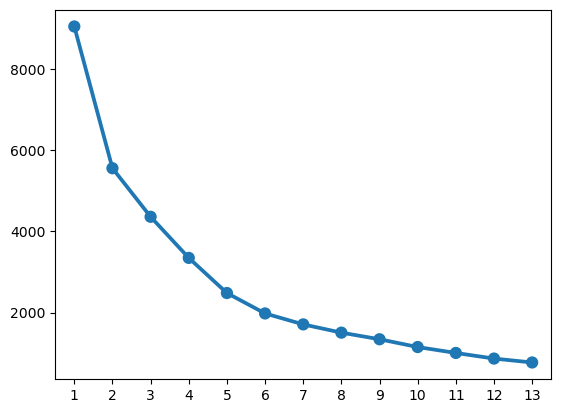

In [114]:
# Elbow curve
sns.pointplot(x=list(range(1,14)), y =wcss)
plt.show()

In [116]:
KM = KMeans(n_clusters=6, init='k-means++', max_iter=1000, random_state=42)
y_kmeans = KM.fit_predict(scaled_data)
y_kmeans

array([3, 3, 3, ..., 3, 0, 3])

In [117]:
scaled_data['Clusters'] = KM.labels_
scaled_data.head()

,Recency,Frequency,Monetary,Clusters
0,-0.640796,0.383014,0.375097,3
1,0.173513,-0.284474,0.032622,3
2,-0.462317,-0.089428,-0.061808,3
3,-0.484627,-0.332151,-0.219173,3
4,-0.585021,-0.037416,-0.090784,3


In [118]:
scaled_data['Clusters'].value_counts()

3    3352
1     589
0     387
5      16
2       4
4       1
Name: Clusters, dtype: int64

In [119]:
unsupervised_data['Clusters'] = KM.labels_
unsupervised_data.head()

,Recency,Frequency,Monetary,Clusters
0,4,181,550416.0,3
1,77,27,257404.0,3
2,20,72,176613.0,3
3,18,16,41976.0,3
4,9,84,151822.0,3


In [120]:
scaled_data.to_csv('Customer_clusters.csv')